### 01. Tensor Manipulation (텐서 다루기)

In [1]:
import numpy as np 
import torch 

In [30]:
### pytorch는 numpy와 매우 유사하다. 
### 1D array with numpy --> 7개의 elements를 가진 1차원 벡터이다. 

t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print('Rank =', t.ndim)
print('Sahpe =', t.shape)

Rank = 1
Sahpe = (7,)


In [4]:
### 기본적인 위치값, 슬라이싱 동일함 
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

0.0 1.0 6.0
[2. 3. 4.] [4. 5.]
[0. 1.] [3. 4. 5. 6.]


In [5]:
### 2D array with numpy 
t = np.array([[1., 2., 3.], [4., 5., 6.], 
              [7., 8., 9.], [10., 11., 12.]])
print(t)
print(t.ndim)
print(t.shape)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
2
(4, 3)


In [6]:
### torch는 numpy와 거의 유사한 방법으로 매트랙스를 만든다 
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])

print(t)
print(t.ndim)
print(t.shape)
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


In [7]:
### 2D array with torch 
t = torch.FloatTensor([[1., 2., 3.], 
                       [4., 5., 6.], 
                       [7., 8., 9.], 
                       [10., 11., 12.]])

print(t)
print(t.dim)
print(t.size())
print(t[:, 1])
print(t[:, :-1])

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
<built-in method dim of Tensor object at 0x00000116FCB67E40>
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


- Pytorch는 Broadcasting 기능을 제공한다. 
- 서로 형태가 다른 텐서들간의 연산이 가능하다. 

In [8]:
## if same shape 
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [9]:
## vector + scalar 
m3 = torch.FloatTensor([[1, 2]])
m4 = torch.FloatTensor([[3]])   ## auto transfer 3 to [[3,3]]
m3 + m4

tensor([[4., 5.]])

In [10]:
## 2x1 vector + 1x2 vecter 
m5 = torch.FloatTensor([[1, 2]])
m6 = torch.FloatTensor([[3], 
                        [4]])
m5 + m6

tensor([[4., 5.],
        [5., 6.]])

- 주의!. 매트릭스의 곱(matmul)과 Manipulation(mul)은 다르다. 
- mul은 broadcating이 적용되어, 각 행렬의 배열을 자동으로 같은 shape로 변경한 후 계산한다. 

In [11]:
print('----- 1. matmul -----')

a1 = torch.FloatTensor([
    [1,2],
    [3,4]
])

a2 = torch.FloatTensor([
    [1], 
    [2]
])

print(a1.matmul(a2))

----- 1. matmul -----
tensor([[ 5.],
        [11.]])


In [12]:
print('----- 2. mul -----')
a3 = torch.FloatTensor([
    [1,2],
    [3,4]
])

a4 = torch.FloatTensor([
    [1], 
    [2]
])

print(a1.mul(a2))
## broadcating에 의해 a4: [[1], [2]]  ==>  [[1, 2], [1, 2]]

----- 2. mul -----
tensor([[1., 2.],
        [6., 8.]])


- troch의 평균/합계 구하는 방법은 numpy와 거의 동일하다.  
  - 다만 output의 형태(shape)를 dim을 사용하여 지정한다. (axis = 0 or 1과 비슷하다.)

In [13]:
tm = torch.FloatTensor([1, 2])
tm.mean()

tensor(1.5000)

In [14]:
tm2 = torch.FloatTensor([
    [1,2], 
    [3,4]
])

print(tm2.mean())
print(tm2.mean(dim=0))
print(tm2.mean(dim=1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])


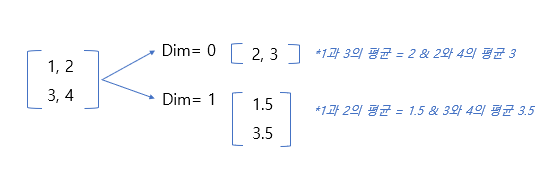

In [15]:
## 계산결과 설명 
from IPython.display import Image
Image("img/aaaa.png")

In [16]:
tm3 = torch.FloatTensor([
    [1,2], 
    [3,4]
])

print(tm3.sum())
print(tm3.sum(dim=0))
print(tm3.sum(dim=1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])


In [17]:
tm3 = torch.FloatTensor([
    [1,2], 
    [3,4]
])

print(tm3.max())
print(tm3.max(dim=0))  ## max값을 가로방향으로 찾는다 (index값도 돌려준다)
print(tm3.max(dim=1))  ## max값을 세로방향으로 찾는다 (index값도 돌려준다)

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


- view는 numpy의 reshape와 비슷하다. 

In [18]:
### 2x2x3 텐서를 만든다. 
t = np.array([
    [[0,1,2], 
    [3,4,5]], 

    [[6,7,8], 
    [9,10,11]]
])

ft = torch.FloatTensor(t)
ft.shape

torch.Size([2, 2, 3])

In [19]:
## view함수로 텐서를 원하는 형태로 변경 
## -1은 모른다, 상관없다는 뜻 
print(ft.view([-1, 3]))   
print(ft.view([-1, 3]).shape)   

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [20]:
### 4x1x3 형태로 변경하는 경우 
print(ft.view([-1, 1, 3]))   
print(ft.view([-1, 1, 3]).shape)   

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


- squeeze는 dimension 1인 것을 없애준다. 

In [21]:
### 3x1의 텐서 
ft2 = torch.FloatTensor([
    [0], 
    [1],
    [2]
])

ft2

tensor([[0.],
        [1.],
        [2.]])

In [22]:
## 3x1에서 squeeze로 1을 없애고 3만 남는다. 
ft2.squeeze()

tensor([0., 1., 2.])

In [23]:
## unsqueeze는 squeeze의 반대, dim 값 지정 필요 
## 보통 dim = -1을 지정해서, 알아서 변경되게 한다. 
print(ft2.unsqueeze(1))
print('----------------------------')
print(ft2.unsqueeze(-1))

tensor([[[0.]],

        [[1.]],

        [[2.]]])
----------------------------
tensor([[[0.]],

        [[1.]],

        [[2.]]])


- 텐서의 형식 변경 하기 

In [24]:
lt = torch.FloatTensor([0,1,0,1,0,1])

print(lt)
print(lt.long())   ## long tensor : 정수
print(lt.byte())   ## byte tensor: 0 = False, 1 = True

tensor([0., 1., 0., 1., 0., 1.])
tensor([0, 1, 0, 1, 0, 1])
tensor([0, 1, 0, 1, 0, 1], dtype=torch.uint8)


- 텐서 합치기 (cat)

In [25]:
x = torch.FloatTensor([
    [1,2], 
    [3,4]
])

y = torch.FloatTensor([
    [5,6], 
    [7,8]
])

torch.cat([x,y])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])

In [26]:
print(torch.cat([x,y], dim = 0))   ## row(axis=0) 합치기 
print('-----------------------------')
print(torch.cat([x,y], dim = 1))   ## col(axis=1) 합치기 

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
-----------------------------
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


- stack은 cat을 좀더 간단하게 실행할 수 있다. 

In [27]:
x1 = torch.FloatTensor([1,4])
y1 = torch.FloatTensor([2,5])
z1 = torch.FloatTensor([3,6])

torch.stack([x1,y1,z1])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [28]:
torch.stack([x1,y1,z1], dim=1)  ## col 방향으로 쌓기

tensor([[1., 2., 3.],
        [4., 5., 6.]])

- zeros_like(x), ones_like(x) : x와 형태가 동일한 0 / 1로 구성된 행렬을 만들어 준다. 

In [31]:
k = torch.Tensor([
    [0,1,2], 
    [2,1,0]
])

k

tensor([[0., 1., 2.],
        [2., 1., 0.]])

In [32]:
torch.zeros_like(k)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [33]:
torch.ones_like(k)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

- mul과 mul_은 다르다. 
    - mul은 원래의 값을 변경하지 않지만, mul_는 연산결과를 원래 값에 덮어 씌운다. (메모리 절감)

In [38]:
j1 = torch.Tensor([
    [1,2], 
    [3,4]
])

j1

tensor([[1., 2.],
        [3., 4.]])

In [39]:
j2 = j1.mul(2)
print(j2)
print(j1)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [40]:
j3 = j1.mul_(2)
print(j3)
print(j1)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
